# INC 5000 Companies

## Indroduction

The dataset is about Inc 5000 companies listed in 2019 year. we will try to explore the dataset and find the useful  
insight, but one one doubt is there that what is excatly Inc 5000 companies?  
-> The Inc. 5000 lists the 5,000 fastest-growing private companies in the US. The Inc. 5000 is ranked according to percentage revenue growth over a three-year period. To qualify, companies must have been founded and generating revenue by the first week of the starting calendar year, and therefore able to show three full calendar years of sales. Additionally, they have to be U.S.-based, privately held, and independent—not subsidiaries or divisions of other companies—as of December 31 of the last year measured. Revenue in the initial year must have been at least $100,000

[![download.jpg](https://i.postimg.cc/TYFRKnj2/download.jpg)](https://postimg.cc/CzCytB69)

* [Data Understanding](#1)
* [Data Preprocesiing](#2)
* [ Data Visualization](#3)
* [Conclusion](#4)

## 1. Data Understanding <a id="1"></a>

**Import Libraries**  
First we will import the required libraries which we needed to preprocess the data and for  Vizualization.

In [1]:
# for precprocessing
import pandas as pd
import numpy as np

# for vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Bird View of Dataset**  
Deep dive in dataset and see the attributes of dataset

In [2]:
# Load the dataset
df = pd.read_csv('../input/inc-5000-companies/INC 5000 Companies 2019.csv')
df.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [3]:
# get the shape of dataset
print('Dataset have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Dataset have 5012 rows and 14 columns


In [4]:
# Use this fucntion to find the data type of variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


**Inference:** The data type of Revenue variable given as object but it needed to change to numeric variable 

In [5]:
# basic statistical properties of numeric variable
df.describe()

,rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


Now we see the descriptive statistics such as count, mean, standard deviation, minimum,maximum, quantiles

In [6]:
# null value percentage 
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

metro               16.221069
workers              0.019952
rank                 0.000000
profile              0.000000
name                 0.000000
url                  0.000000
state                0.000000
revenue              0.000000
growth_%             0.000000
industry             0.000000
previous_workers     0.000000
founded              0.000000
yrs_on_list          0.000000
city                 0.000000
dtype: float64

In [7]:
df['workers'].isna().sum()

1

**Inference:** In the dataset null value is only there in two column, metro and workers.

## 2. Data Preprocessing  <a id="2"></a>
In this part we will deal with the missing value, outlier, different data type of variable.  
This section handles wrangling the data and solving any apparent exisiting issues.



**Change the data type**  
We will change the datatype of revenue from obect to numeric(float)

In [8]:
df['revenue'] = df['revenue'].replace({'Million':'', 'Billion': '*1000'}, regex = True).map(pd.eval)
print(df['revenue'].dtype)

# change the column name
df.rename(columns = {'revenue':'revenue_in_millions'}, inplace = True)  

float64


In [9]:
df.head()

,rank,profile,name,url,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


**Dealing with missing value**  
Metro variable contain almost 16.30% missing value so we will substitute the null value with the mode value and  
workers variable contian missing value less than 0.02% so simply remove the null value as missing is very less

In [10]:
mode_value = df['metro'].mode()  # calculate the mode of metro variable
df['metro'].fillna(mode_value[0], inplace = True)    # replace the null value with mode value

# now check the null value
print('Null value in metro variable:',df['metro'].isna().sum())

# remove the null value from workers column
df.dropna(axis = 0, inplace = True)

print('Null value in metro variable:',df['workers'].isna().sum())



Null value in metro variable: 0
Null value in metro variable: 0


**Inference:**  Now in dataset there is no null value as null value in metro is replace by mode and workers null value are removed

**Remove the unwanted column**  
As the profile and url column have no use, it will be better to drop that column frim the dataset

In [11]:
df.drop(['profile','url'], axis = 1, inplace = True)
df.head()

,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,Freestar,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,FreightWise,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,Cece's Veggie Co.,TX,24.9,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,LadyBoss,NM,32.4,21849.8925,Consumer Products & Services,57.0,2,2014,1,New York City,Albuquerque
4,5,Perpay,PA,22.5,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


## 3. Data Visualization <a id="3"></a>

**1)Top 10 state from where maximum comapanies are established ?**

In [12]:
df1 = df['state'].value_counts().head(10).reset_index()
df1.columns = ['state', 'count']

px.bar(df1,x = 'count', 
       y = 'state',
       color_discrete_sequence =  px.colors.sequential.Viridis,
      title = 'Top 10 state from where maximum comapanies are established')

**Inference:** maximum number of comapny are established in california which is 712 followed by texas and florida.

 **2) Top company who have the hightest revenue in Inc 5000**

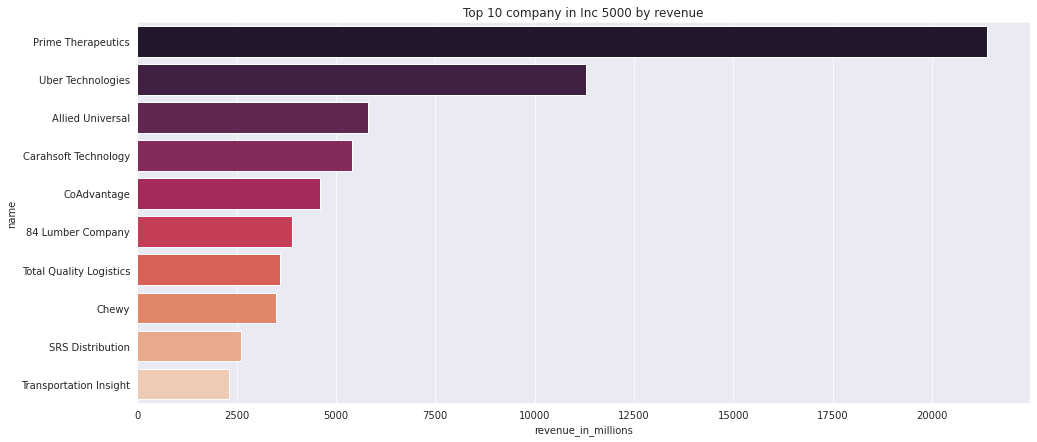

In [13]:
df2 = df.nlargest(10,['revenue_in_millions'])
df2 = df2[['name', 'revenue_in_millions']]

sns.set_style('darkgrid')
plt.figure(figsize = (16,7))
sns.color_palette("crest", as_cmap=True)

sns.barplot(x = 'revenue_in_millions', y = 'name', data = df2, palette = 'rocket')
plt.title('Top 10 company in Inc 5000 by revenue');

**Infernce:** The Prime Therapeutics company make highest revenue of 21400 million then by  
Uber techologies and Allied Univeral

**3) Which are the most prominent industry in  Inc 5000 ?**

In [14]:
df3 = df['industry'].value_counts().head(10).reset_index()
df3.columns = ['industry', 'count']
df3

fig = px.treemap(df3, path = ['industry'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

**Infernce:** The most prominent industry are Business Products & Services, Advertising & Marketing, Software and Health

**4) Distribution of Revenue of a companies?**

In [15]:
lower_limit = np.quantile(df['revenue_in_millions'],0.05 )
upper_limit = np.quantile(df['revenue_in_millions'],0.95 )

df['revenue_in_millions'].clip(lower_limit, upper_limit, inplace=True)
fig2 = px.histogram(df, x = 'revenue_in_millions', marginal = 'box',
                    title = 'Distribution of Revenue', 
                   color_discrete_sequence=px.colors.qualitative.D3,
                   nbins = 75)
fig2.update_traces(marker_line_width=1,marker_line_color="white")

fig2.show()

**Inference** Most companies revenue are lie under 60 million and few of them also cross the revenue of more than 120 million and one good insight is that almost 1500 companies from 5000 revenue is between 2-8 million.

**5) Which state have the highest revenue companies?**

In [16]:
df5 = df.groupby(['state'])['revenue_in_millions'].sum().sort_values(ascending = False).head(10).reset_index()
df5

px.bar(df5, x = 'revenue_in_millions',y = 'state', color_discrete_sequence =  px.colors.sequential.Inferno)

**Inference:** Here we see that the state California , texas, florida, new york companies make highest revenue.

**6)Which industries saw the largest average growth rate?**

In [17]:
df6 = df.groupby(['industry'])['growth_%'].mean().sort_values(ascending = False).head(10).reset_index()
df6

px.bar(df6, x = 'growth_%',y = 'industry',color_discrete_sequence = ['darkred'])
                 

**Inference:** We find that on an average logistics & transportation make highest growth of almost 720% and then  
              followed by Consumer product & services and food and bevarge but there is not much differnce among other industry

**7) Which companies had the largest increase in staff/new hires?**

In [18]:
df['new_workers'] = df['workers'] - df['previous_workers']
df7 = df.groupby(['industry'])['new_workers'].sum().sort_values(ascending = False).head(10).reset_index()
df7

px.bar(df7, x = 'new_workers',y = 'industry',color_discrete_sequence = ['orange'])

**Inference:** Maximum hiring is done in software industry which is almost 10K greater than second industry of marketing.

### 3. Conclusion:  <a id="4"></a>
In this dataset first we look at a dataset and try to understand the data by looking the data type of variable,  
various properties of dataset. Then we preprocess the data by filtering the missing value, remove the outlier,  
remove the unwanted the columns and change the data type of variable which are necessary for further process and finally  
we went to Data Visualization where we find the top companies interm of revenue. which are most suitable state to   
established company. In which sector there highest increase in staff.Finded the distributon of revenue of all company.